# **1. Import Library**

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from collections import Counter
import heapq

# **2. Import Dataset**

In [38]:
# Import dataset (kendaraan_train.csv) into new dataframe named data_train
data_train = pd.read_csv("https://raw.githubusercontent.com/furqonfahlevi/classification-ml/main/kendaraan_train.csv")
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [39]:
# Import dataset (kendaraan_test.csv) into new dataframe named data_test
data_test = pd.read_csv("https://raw.githubusercontent.com/furqonfahlevi/classification-ml/main/kendaraan_test.csv")
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [40]:
print("Data Train Shape", data_train.shape)
print("Data Test Shape", data_test.shape)

Data Train Shape (285831, 12)
Data Test Shape (47639, 11)


# **3. Do pre-processing for dataset**

**Drop unnecessary column**

In [41]:
del data_train['id']
data_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


**Duplicated data**

In [42]:
# Check duplicate data
print("Duplicated data:",data_train.duplicated().sum())
print("Duplicated data:",data_test.duplicated().sum())
data_train.drop_duplicates(inplace=True)
data_test.drop_duplicates(inplace=True)

Duplicated data: 169
Duplicated data: 3


In [43]:
print("Duplicated data:",data_train.duplicated().sum())
print("Duplicated data:",data_test.duplicated().sum())

Duplicated data: 0
Duplicated data: 0


**Encoder Data**

In [44]:
categorical = ["Jenis_Kelamin", "Kendaraan_Rusak", "Umur_Kendaraan"]

In [45]:
data_train = pd.get_dummies(data_train, columns=categorical)
data_train.sample(3)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
243621,47.0,1.0,8.0,0.0,84715.0,NaN,31.0,1,1,0,1,0,0,0,1
247960,35.0,1.0,9.0,1.0,35130.0,152.0,182.0,0,0,1,0,1,1,0,0
55294,26.0,1.0,11.0,1.0,44761.0,152.0,233.0,0,0,1,0,1,0,1,0


In [46]:
data_test = pd.get_dummies(data_test, columns=categorical)
data_test.sample(3)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
43100,32,1,11,0,19444,31,10,0,0,1,1,0,1,0,0
1026,54,1,23,0,24068,26,174,0,1,0,0,1,1,0,0
10802,30,1,28,1,25986,152,181,0,0,1,0,1,0,1,0


**Check NaN**

In [47]:
data_train.isna().sum()

Umur                        14199
SIM                         14404
Kode_Daerah                 14291
Sudah_Asuransi              14229
Premi                       14510
Kanal_Penjualan             14297
Lama_Berlangganan           13926
Tertarik                        0
Jenis_Kelamin_Pria              0
Jenis_Kelamin_Wanita            0
Kendaraan_Rusak_Pernah          0
Kendaraan_Rusak_Tidak           0
Umur_Kendaraan_1-2 Tahun        0
Umur_Kendaraan_< 1 Tahun        0
Umur_Kendaraan_> 2 Tahun        0
dtype: int64

In [48]:
data_train["SIM"].fillna(0, inplace=True)
data_train["Sudah_Asuransi"].fillna(0, inplace=True)
data_train["Umur"].fillna(data_train["Umur"].mean(), inplace=True)
data_train["Premi"].fillna(data_train["Premi"].median(), inplace=True)
data_train["Kanal_Penjualan"].fillna(data_train["Kanal_Penjualan"].mean(), inplace=True)
data_train["Lama_Berlangganan"].fillna(data_train["Lama_Berlangganan"].mean(), inplace=True)
data_train["Kode_Daerah"].fillna(data_train["Kode_Daerah"].mean(), inplace=True)

In [49]:
data_train.isna().sum()

Umur                        0
SIM                         0
Kode_Daerah                 0
Sudah_Asuransi              0
Premi                       0
Kanal_Penjualan             0
Lama_Berlangganan           0
Tertarik                    0
Jenis_Kelamin_Pria          0
Jenis_Kelamin_Wanita        0
Kendaraan_Rusak_Pernah      0
Kendaraan_Rusak_Tidak       0
Umur_Kendaraan_1-2 Tahun    0
Umur_Kendaraan_< 1 Tahun    0
Umur_Kendaraan_> 2 Tahun    0
dtype: int64

In [50]:
data_test.isna().sum()

Umur                        0
SIM                         0
Kode_Daerah                 0
Sudah_Asuransi              0
Premi                       0
Kanal_Penjualan             0
Lama_Berlangganan           0
Tertarik                    0
Jenis_Kelamin_Pria          0
Jenis_Kelamin_Wanita        0
Kendaraan_Rusak_Pernah      0
Kendaraan_Rusak_Tidak       0
Umur_Kendaraan_1-2 Tahun    0
Umur_Kendaraan_< 1 Tahun    0
Umur_Kendaraan_> 2 Tahun    0
dtype: int64

**Data Standarization**

In [51]:
scaler = MinMaxScaler()
columns = ["Umur", "Kode_Daerah", "Premi", "Kanal_Penjualan", "Lama_Berlangganan"]
data_train[columns] = scaler.fit_transform(data_train[columns])
data_train.sample(3)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
86995,0.692308,1.0,0.211538,0.0,0.069201,0.154321,0.020761,0,1,0,1,0,1,0,0
93023,0.061538,1.0,0.711538,1.0,0.042814,0.932099,0.176471,0,0,1,1,0,0,1,0
60763,0.046154,1.0,0.211538,0.0,0.062950,0.685282,0.231834,0,0,1,0,1,0,1,0


In [52]:
data_test[columns] = scaler.fit_transform(data_test[columns])
data_test.sample(3)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
1342,0.369231,1,0.173077,0,0.071262,0.746914,0.678201,0,0,1,0,1,1,0,0
34865,0.492308,1,0.538462,0,0.070535,0.759259,0.806228,0,1,0,1,0,1,0,0
25798,0.046154,1,0.826923,1,0.046097,0.932099,0.941176,0,1,0,0,1,0,1,0


**Check outliers**

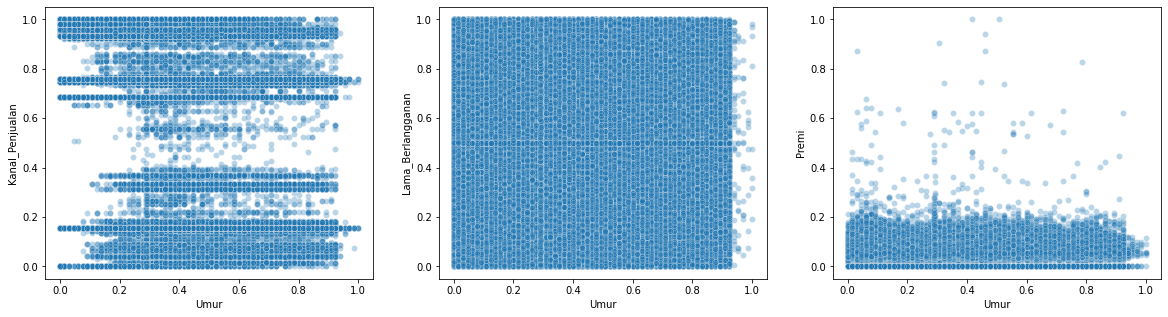

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
sns.scatterplot(data=data_train, x="Umur", y="Kanal_Penjualan", ax=axes[0], alpha=0.3)
sns.scatterplot(data=data_train, x="Umur", y="Lama_Berlangganan", ax=axes[1], alpha=0.3)
sns.scatterplot(data=data_train, x="Umur", y="Premi", ax=axes[2], alpha=0.3)
plt.show()

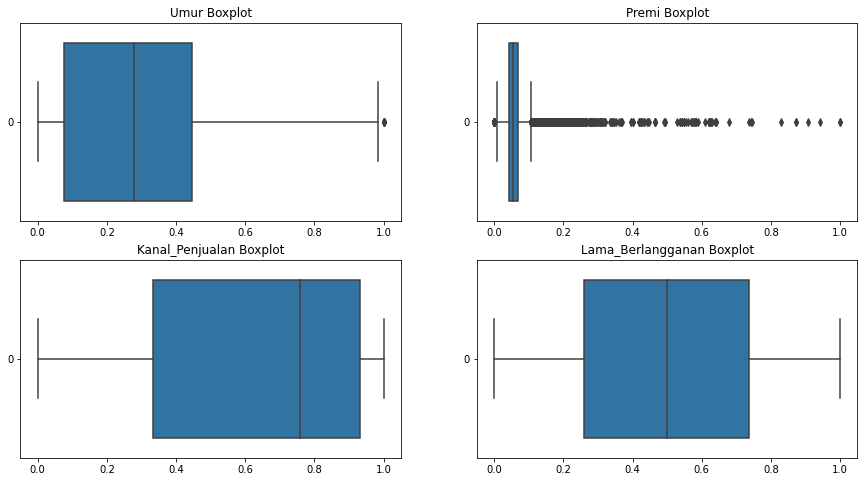

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

axes[0, 0].title.set_text("Umur Boxplot")
axes[0, 1].title.set_text("Premi Boxplot")
axes[1, 0].title.set_text("Kanal_Penjualan Boxplot")
axes[1, 1].title.set_text("Lama_Berlangganan Boxplot")

sns.boxplot(data=data_train["Umur"], ax=axes[0, 0], orient="horizontal")
sns.boxplot(data=data_train["Premi"], ax=axes[0, 1], orient="horizontal")
sns.boxplot(data=data_train["Kanal_Penjualan"], ax=axes[1, 0], orient="horizontal")
sns.boxplot(data=data_train["Lama_Berlangganan"], ax=axes[1, 1], orient="horizontal")
plt.show()

**Z-Score method**

In [55]:
columns = ['Kanal_Penjualan', 'Premi', 'Umur', 'Lama_Berlangganan']
z = np.abs(stats.zscore(data_train[columns]))
threshold = 3

data_train_new = data_train[(z < threshold).all(axis=1)]
data_train_new.sample(3)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
75221,0.215385,1.0,0.269231,1.0,0.050475,0.932099,0.297578,0,1,0,0,1,1,0,0
7284,0.369231,1.0,0.538462,0.0,0.048209,0.759259,0.647059,0,1,0,1,0,1,0,0
73768,0.046154,1.0,0.865385,1.0,0.033021,0.932099,0.543253,0,0,1,0,1,0,1,0


In [56]:
columns = ['Kanal_Penjualan', 'Premi', 'Umur', 'Lama_Berlangganan']
z = np.abs(stats.zscore(data_test[columns]))
threshold = 3

data_test_new = data_test[(z < threshold).all(axis=1)]
data_test_new.sample(3)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Jenis_Kelamin_Pria,Jenis_Kelamin_Wanita,Kendaraan_Rusak_Pernah,Kendaraan_Rusak_Tidak,Umur_Kendaraan_1-2 Tahun,Umur_Kendaraan_< 1 Tahun,Umur_Kendaraan_> 2 Tahun
3165,0.061538,1,0.211538,1,0.095434,0.932099,0.325260,0,1,0,0,1,0,1,0
14540,0.353846,1,0.788462,1,0.051524,0.154321,0.083045,0,1,0,0,1,1,0,0
25440,0.061538,1,0.153846,1,0.075152,0.932099,0.287197,0,1,0,0,1,0,1,0


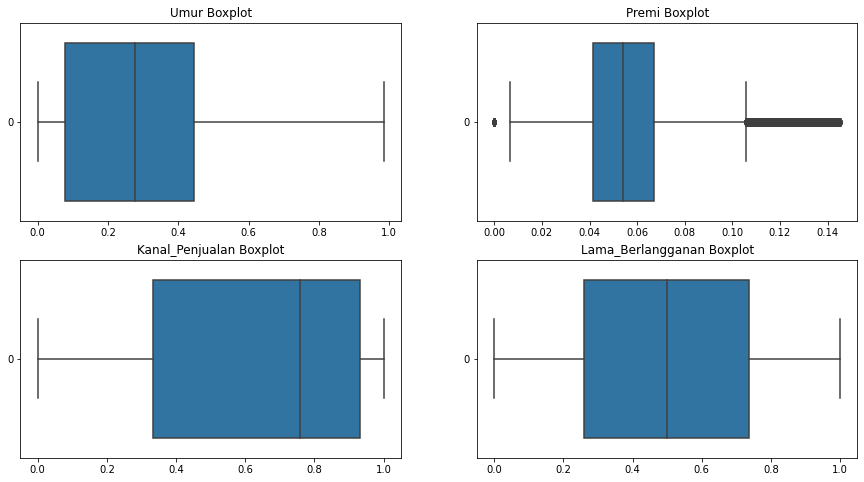

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

axes[0, 0].title.set_text("Umur Boxplot")
axes[0, 1].title.set_text("Premi Boxplot")
axes[1, 0].title.set_text("Kanal_Penjualan Boxplot")
axes[1, 1].title.set_text("Lama_Berlangganan Boxplot")

sns.boxplot(data=data_train_new["Umur"], ax=axes[0, 0], orient="horizontal")
sns.boxplot(data=data_train_new["Premi"], ax=axes[0, 1], orient="horizontal")
sns.boxplot(data=data_train_new["Kanal_Penjualan"], ax=axes[1, 0], orient="horizontal")
sns.boxplot(data=data_train_new["Lama_Berlangganan"], ax=axes[1, 1], orient="horizontal")
plt.show()

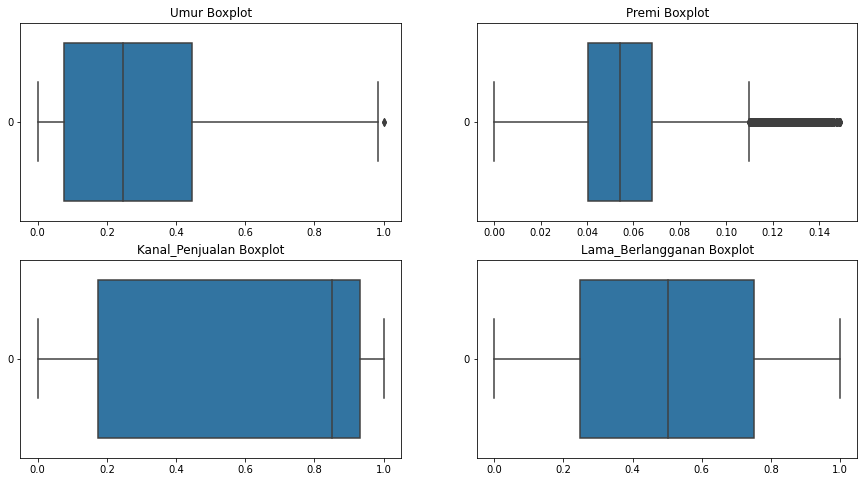

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

axes[0, 0].title.set_text("Umur Boxplot")
axes[0, 1].title.set_text("Premi Boxplot")
axes[1, 0].title.set_text("Kanal_Penjualan Boxplot")
axes[1, 1].title.set_text("Lama_Berlangganan Boxplot")

sns.boxplot(data=data_test_new["Umur"], ax=axes[0, 0], orient="horizontal")
sns.boxplot(data=data_test_new["Premi"], ax=axes[0, 1], orient="horizontal")
sns.boxplot(data=data_test_new["Kanal_Penjualan"], ax=axes[1, 0], orient="horizontal")
sns.boxplot(data=data_test_new["Lama_Berlangganan"], ax=axes[1, 1], orient="horizontal")
plt.show()

**Dimensial Reduction (PCA)**

In [59]:
X = data_train_new.drop(columns=["Tertarik"])
y = data_train_new[["Tertarik"]]

X_test_data = data_test_new.drop(columns=["Tertarik"])
y_test_data = data_test_new[["Tertarik"]]

In [60]:
pca = PCA(n_components=2)
principal_df = pd.DataFrame(data = pca.fit_transform(X))
principal_test = pd.DataFrame(data = pca.fit_transform(X_test_data))

In [61]:
print(f"Data Train New Shape: {principal_df.shape}")
print(f"Data Test New Shape: {principal_test.shape}")

Data Train New Shape: (284032, 2)
Data Test New Shape: (47383, 2)


**Data Splitting**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size = 0.2, random_state = 42)

In [63]:
print(f"X_train shape: {X_train.shape} | X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} | y_test shape: {y_test.shape}")

X_train shape: (227225, 2) | X_test shape: (56807, 2)
y_train shape: (227225, 1) | y_test shape: (56807, 1)


# **4. Implementation model**

**Evaluation Metrics**

- Accuracy
- Precision
- Recall
- F1 Score

In [64]:
class Metrics:
  def __init__(self, prediction, test):

    if isinstance(test, pd.DataFrame):
      test = test.values
    
    if isinstance(prediction, pd.DataFrame):
      prediction = prediction.values

    self.prediction =  np.array(prediction)
    self.test = np.array(test).reshape(-1)
    
    unique = set(self.prediction)
    matrix = [list() for x in range(len(unique))]
    for i in range(len(unique)):
      matrix[i] = [0 for x in range(len(unique))]
    lookup = dict()
    for i, value in enumerate(unique):
      lookup[value] = i
    for i in range(len(self.prediction)):
      x = lookup[self.prediction[i]]
      y = lookup[self.test[i]]
      matrix[y][x] += 1
    matrix[0][1], matrix[1][0] = matrix[1][0], matrix[0][1] 
    
    self.tn = matrix[0][0]
    self.tp = matrix[1][1]
    self.fn = matrix[1][0]
    self.fp = matrix[0][1]
    self.matrix = matrix
  
  def accuracy_metric(self):
    correct = 0
    for i in range(len(self.prediction)):
      if self.prediction[i] == self.test[i]:
        correct += 1
    return correct / float(len(self.prediction)) * 100.0
  
  def confusion_matrix(self):
    return self.matrix
  
  def f1_score(self):
    p = self.precision_score() 
    r = self.recall_score()
    return (2 * ((p * r) / (p + r))) / 100

  def precision_score(self):
    return (self.tp / ((self.tp) + (self.fp))) * 100

  def recall_score(self):
    return (self.tp / ((self.tp) + (self.fn))) * 100

  def visualize_confustion_matrix(self):
    cf = self.confusion_matrix()
    sns.heatmap(cf, 
                xticklabels=["Negative (0)", "Positive (1)"], 
                yticklabels=["Negative (0)", "Positive (1)"], 
                annot=True, fmt='d', 
                cmap="YlGnBu", linewidths=10)
    plt.show()
  
  def show(self):
    self.visualize_confustion_matrix()
    print("Accuracy with K-NN: {0:.2f}%".format(self.accuracy_metric()))
    print("Precision with K-NN: {0:.2f}%".format(self.precision_score()))
    print("Recall with K-NN: {0:.2f}%".format(self.recall_score()))
    print("F1-Score with K-NN: {0:.2f}".format(self.f1_score()))

**kNN**

In [65]:
class KDNode:
    def __init__(self, points, label, left = None, right = None, distance = np.inf):
        self.points = points
        self.label = label
        self.distance = distance
        
        self.left = left
        self.right = right
    def __lt__(self, other):
        return self.distance < other.distance

In [66]:
class KDTree:
    def __init__(self, k = 2, p = 2):
        self.tree = None
        self.k = k
        self.depth = 0
        self.heap = []
        self.p = p
    
    def fit(self, X, y):
        self.X = X
        self.y = y

        if isinstance(X, pd.DataFrame):
            X = X.values
        
        if isinstance(y, pd.DataFrame):
            y = y.values

        self.tree = self._construct_tree(np.array(X), np.array(y).reshape(-1), 0)
    
    def _construct_tree(self, points, y, depth):
        if len(points) == 0:
            return None
        
        k = len(points[0])
        axis = depth % k
        
        sort_by_axis = np.argsort(points[:, axis])
        sorted_points = points[sort_by_axis]
        sorted_y =  y[sort_by_axis]
        mid = len(sorted_points) // 2

        return KDNode(
            sorted_points[mid],
            sorted_y[mid],
            self._construct_tree(sorted_points[:mid], sorted_y[:mid], depth + 1),
            self._construct_tree(sorted_points[mid + 1:],sorted_y[mid + 1:], depth + 1)
        )
  
    def nearest_neighbour_search(self, query_point):
        k = len(query_point)
        heap = []
        
        def search(node, depth):
            if node == None:
                return

            nonlocal heap
            
            d = np.linalg.norm(query_point - node.points, ord = self.p)
            node.distance = -d
            
            if len(heap) < self.k:
                heapq.heappush(heap, node)
            else:
                heapq.heappushpop(heap, node)

            axis = depth % k

            if query_point[axis] < node.points[axis]:
                close, other = node.left, node.right
            else:
                close, other = node.right, node.left

            search(close, depth + 1)

            delta = abs(query_point[axis] - node.points[axis])
            nearest = abs(heap[0].distance)
            isFull = len(heap) > self.k

            if len(heap) < self.k or delta < nearest:
                search(other, depth + 1)

        search(self.tree, 0)
        return heap

    def predict(self, X_test):
        results = []
        if isinstance(X_test, pd.DataFrame):
            X_test = X_test.values
            
        for test in X_test:
            result = self.nearest_neighbour_search(test)
            predict_values = [item.label for item in result]
            counter = Counter(predict_values)
            results.append(counter.most_common(1)[0][0])
        return results

**Creating kNN Model**

In [67]:
knn = KDTree(k = 5, p = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

**Result**

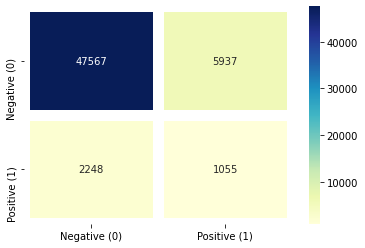

Accuracy with K-NN: 85.59%
Precision with K-NN: 15.09%
Recall with K-NN: 31.94%
F1-Score with K-NN: 0.20


In [68]:
metric_knn = Metrics(y_pred, y_test)
metric_knn.show()

**Validation Test**

In [69]:
y_pred_test = knn.predict(principal_test)

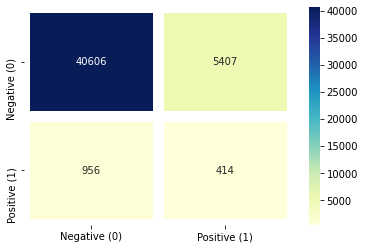

Accuracy with K-NN: 86.57%
Precision with K-NN: 7.11%
Recall with K-NN: 30.22%
F1-Score with K-NN: 0.12


In [70]:
metric_knn_test = Metrics(y_pred_test, y_test_data)
metric_knn_test.show()

# **5. Experiment**

**Accuracy vs K-value**

In [71]:
# """
# Warning this will took some time
# """
# accuracies = []
# for i in range(1, 40):
#   knn_iter = KDTree(k=i, p=2)
#   knn_iter.fit(X_train, y_train)
#   y_pred_iter = knn_iter.predict(X_test)
#   precision_iter = Metrics(y_pred_iter, y_test).accuracy_metric()
#   accuracies.append(precision_iter)

In [72]:
# plt.figure(figsize=(15,7))
# plt.plot(np.linspace(1, 39, 39), accuracies)
# plt.show()

**Oversampling**

In [73]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(principal_df, data_train_new[["Tertarik"]])

In [74]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size = 0.2, random_state = 42)

In [75]:
knn_ros = KDTree(k = 5, p = 2)
knn_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = knn_ros.predict(X_test_ros)

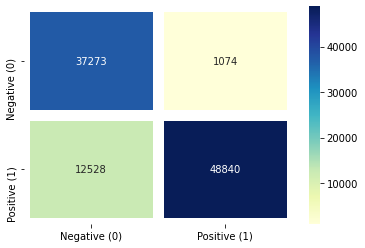

Accuracy with K-NN: 86.36%
Precision with K-NN: 97.85%
Recall with K-NN: 79.59%
F1-Score with K-NN: 0.88


In [76]:
metrics_ros = Metrics(y_pred_ros, y_test_ros)
metrics_ros.show()

In [77]:
# accuracies_ros = []
# for i in range(1, 40):
#   knn_iter_ros = KDTree(k=i, p=2)
#   knn_iter_ros.fit(X_train_ros, y_train_ros)
#   y_pred_iter_ros = knn_iter_ros.predict(X_test_ros)
#   precision_iter_ros = Metrics(y_pred_iter_ros, y_test_ros).accuracy_metric()
#   accuracies_ros.append(precision_iter_ros)

In [78]:
# plt.figure(figsize=(15,7))
# plt.plot(np.linspace(1, 39, 39), accuracies_ros)
# plt.show()

**Validation Test using Oversampling**

Warning, Running this took 10 minutes 🐢

In [79]:
y_pred_test_ros = knn_ros.predict(principal_test)

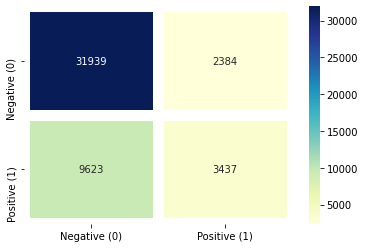

Accuracy with K-NN: 74.66%
Precision with K-NN: 59.04%
Recall with K-NN: 26.32%
F1-Score with K-NN: 0.36


In [80]:
metrics_ros = Metrics(y_pred_test_ros, y_test_data)
metrics_ros.show()

**Undersampling**

In [81]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(principal_df, data_train_new[["Tertarik"]])

In [82]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size = 0.2, random_state = 42)

In [83]:
knn_rus = KDTree(k = 5, p = 2)
knn_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = knn_rus.predict(X_test_rus)

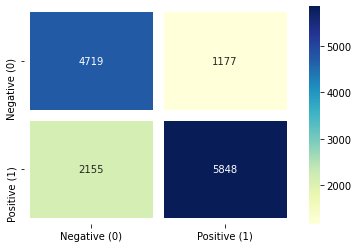

Accuracy with K-NN: 76.03%
Precision with K-NN: 83.25%
Recall with K-NN: 73.07%
F1-Score with K-NN: 0.78


In [84]:
metrics_rus = Metrics(y_pred_rus, y_test_rus)
metrics_rus.show()

In [85]:
# accuracies_rus = []
# for i in range(1, 40):
#   knn_iter_rus = KDTree(k=i, p=2)
#   knn_iter_rus.fit(X_train_rus, y_train_rus)
#   y_pred_iter_rus = knn_iter_rus.predict(X_test_rus)
#   precision_iter_rus = Metrics(y_pred_iter_rus, y_test_rus).accuracy_metric()
#   accuracies_rus.append(precision_iter_rus)

In [86]:
# plt.figure(figsize=(15,7))
# plt.plot(np.linspace(1, 39, 39), accuracies_rus)
# plt.show()

**Validation Test using Undersampling**

Warning, Running this took 10 minutes 🐢

In [87]:
y_pred_test_rus = knn_rus.predict(principal_test)

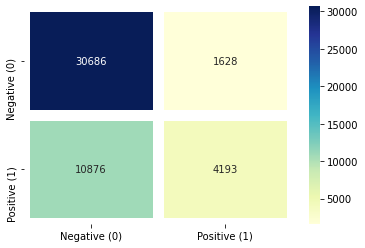

Accuracy with K-NN: 73.61%
Precision with K-NN: 72.03%
Recall with K-NN: 27.83%
F1-Score with K-NN: 0.40


In [88]:
metrics_rus = Metrics(y_pred_test_rus, y_test_data)
metrics_rus.show()